In [14]:
import pandas as pd
orders = pd.read_csv("C:\\Users\\yashc\\Desktop\\PORTFOLIO - (PROJECTS)\\Blinkit - Sales Forecasting (Project)\\Dataset\\blinkit_orders.csv")
order_items = pd.read_csv("C:\\Users\\yashc\\Desktop\\PORTFOLIO - (PROJECTS)\\Blinkit - Sales Forecasting (Project)\\Dataset\\blinkit_order_items.csv")
products = pd.read_csv("C:\\Users\\yashc\\Desktop\\PORTFOLIO - (PROJECTS)\\Blinkit - Sales Forecasting (Project)\\Dataset\\blinkit_products.csv")
inventory = pd.read_csv("C:\\Users\\yashc\\Desktop\\PORTFOLIO - (PROJECTS)\\Blinkit - Sales Forecasting (Project)\\Dataset\\blinkit_inventory.csv")

In [32]:
inventory.head()

,product_id,date,stock_received,damaged_stock
0,153019,17-03-2023,4,2
1,848226,17-03-2023,4,2
2,965755,17-03-2023,1,0
3,39154,17-03-2023,4,0
4,34186,17-03-2023,3,2


In [25]:
orders.isnull().sum()
order_items.isnull().sum() 
products.isnull().sum()
inventory.isnull().sum()

product_id        0
date              0
stock_received    0
damaged_stock     0
dtype: int64

In [34]:
orders['order_date'] = pd.to_datetime(orders['order_date'], errors='coerce')
inventory['date'] = pd.to_datetime(inventory['date'], errors='coerce')
inventory 

,product_id,date,stock_received,damaged_stock
0,153019,2023-03-17,4,2
1,848226,2023-03-17,4,2
2,965755,2023-03-17,1,0
3,39154,2023-03-17,4,0
4,34186,2023-03-17,3,2
...,...,...,...,...
75167,298985,2024-11-05,3,0
75168,679284,2024-11-05,3,0
75169,240179,2024-11-05,3,0
75170,673058,2024-11-05,3,2


In [36]:
products.head()

,product_id,product_name,category,brand,price,mrp,margin_percentage,shelf_life_days,min_stock_level,max_stock_level
0,153019,Onions,Fruits & Vegetables,Aurora LLC,947.95,1263.93,25.0,3,13,88
1,11422,Potatoes,Fruits & Vegetables,Ramaswamy-Tata,127.16,169.55,25.0,3,20,65
2,669378,Potatoes,Fruits & Vegetables,Chadha and Sons,212.14,282.85,25.0,3,23,70
3,848226,Tomatoes,Fruits & Vegetables,Barad and Sons,209.59,279.45,25.0,3,10,51
4,890623,Onions,Fruits & Vegetables,"Sangha, Nagar and Varty",354.52,472.69,25.0,3,27,55


In [78]:
merged_data = pd.merge(orders, order_items, on='order_id', how='inner')
merged_data = pd.merge(merged_data, products, on='product_id', how='inner')

In [90]:
print(merged_data.columns)

Index(['order_id', 'customer_id', 'promised_delivery_time',
       'actual_delivery_time', 'delivery_status', 'order_total',
       'payment_method', 'delivery_partner_id', 'store_id', 'product_id',
       'quantity', 'unit_price', 'product_name', 'category', 'brand', 'price',
       'mrp', 'margin_percentage', 'shelf_life_days', 'min_stock_level',
       'max_stock_level'],
      dtype='object')


In [91]:
merged_data.head()

,order_id,customer_id,promised_delivery_time,actual_delivery_time,delivery_status,order_total,payment_method,delivery_partner_id,store_id,product_id,...,unit_price,product_name,category,brand,price,mrp,margin_percentage,shelf_life_days,min_stock_level,max_stock_level
order_date,,,,,,,,,,,,,,,,,,,,,
2024-07-17 08:34:01,1961864118,30065862,2024-07-17 08:52:01,2024-07-17 08:47:01,On Time,3197.07,Cash,63230,4771,642612,...,517.03,Pet Treats,Pet Care,Pillay-Ahuja,517.03,795.43,35.0,365,16,57
2024-05-28 13:14:29,1549769649,9573071,2024-05-28 13:25:29,2024-05-28 13:27:29,On Time,976.55,Cash,14983,7534,378676,...,881.42,Orange Juice,Cold Drinks & Juices,Baral-Kamdar,881.42,1259.17,30.0,180,19,65
2024-09-23 13:07:12,9185164487,45477575,2024-09-23 13:25:12,2024-09-23 13:29:12,On Time,839.05,UPI,39859,9886,741341,...,923.84,Eggs,Dairy & Breakfast,Prasad LLC,923.84,1154.80,20.0,7,13,62
2023-11-24 16:16:56,9644738826,88067569,2023-11-24 16:34:56,2023-11-24 16:33:56,On Time,440.23,Card,61497,7917,561860,...,874.78,Orange Juice,Cold Drinks & Juices,Gupta Ltd,874.78,1249.69,30.0,180,21,90
2023-11-20 05:00:39,5427684290,83298567,2023-11-20 05:17:39,2023-11-20 05:18:39,On Time,2526.68,Cash,84315,2741,602241,...,976.55,Nuts,Snacks & Munchies,Bahl-Pau,976.55,1502.38,35.0,90,12,75


In [89]:
merged_data.set_index('order_date', inplace=True)

In [94]:
monthly_sales = merged_data.resample('M').agg({'order_total': 'sum', 'quantity': 'sum'})
monthly_sales.head()

C:\Users\yashc\AppData\Local\Temp\ipykernel_11956\3055232768.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = merged_data.resample('M').agg({'order_total': 'sum', 'quantity': 'sum'})


,order_total,quantity
order_date,,
2023-03-31,272878.96,227
2023-04-30,554344.77,483
2023-05-31,608213.54,560
2023-06-30,505227.66,457
2023-07-31,567639.91,470


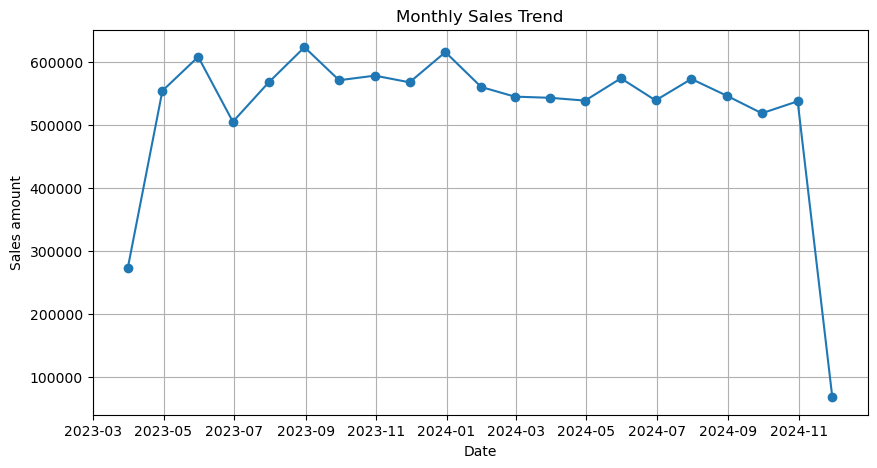

In [99]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(monthly_sales.index, monthly_sales['order_total'], marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Sales amount')
plt.grid(True)
plt.show()

In [103]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(monthly_sales['order_total'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:")
for key, value in result[4].items():
    print(f"   {key}: {value}")

ADF Statistic: 0.7788180438249457
p-value: 0.9912864422847009
Critical Values:
   1%: -4.137829282407408
   5%: -3.1549724074074077
   10%: -2.7144769444444443


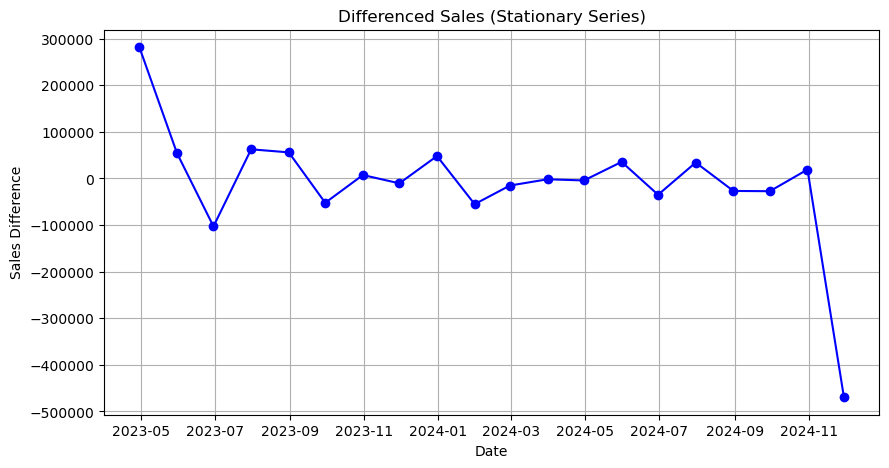

In [108]:
monthly_sales['order_total_diff'] = monthly_sales['order_total'].diff().dropna()
plt.figure(figsize=(10,5))
plt.plot(monthly_sales['order_total_diff'], color='blue', marker='o')
plt.title("Differenced Sales (Stationary Series)")
plt.xlabel("Date")
plt.ylabel("Sales Difference")
plt.grid(True)
plt.show()

In [109]:
result_diff = adfuller(monthly_sales['order_total_diff'].dropna())
print("ADF Statistic:", result_diff[0])
print("p-value:", result_diff[1])

ADF Statistic: -1.553344961787151
p-value: 0.506976919797103


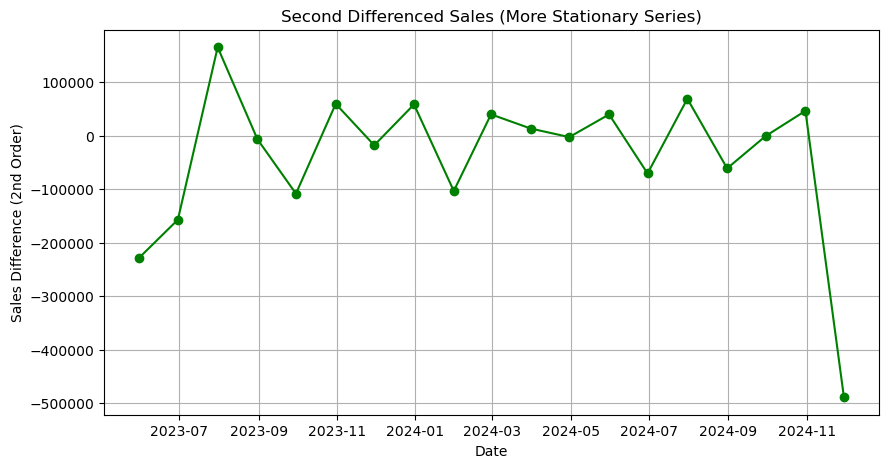

In [110]:
monthly_sales['order_total_diff2'] = monthly_sales['order_total_diff'].diff().dropna()
plt.figure(figsize=(10,5))
plt.plot(monthly_sales['order_total_diff2'], color='green', marker='o')
plt.title("Second Differenced Sales (More Stationary Series)")
plt.xlabel("Date")
plt.ylabel("Sales Difference (2nd Order)")
plt.grid(True)
plt.show()

In [112]:
result_diff2 = adfuller(monthly_sales['order_total_diff2'].dropna())
print('ADF Statistic:', result_diff2[0])
print('P-value:', result_diff2[1])

ADF Statistic: -4.235866302365475
P-value: 0.0005726041397333476


In [132]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(monthly_sales['order_total'], order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:            order_total   No. Observations:                   21
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -262.561
Date:                Wed, 05 Nov 2025   AIC                            531.122
Time:                        17:09:31   BIC                            534.109
Sample:                    03-31-2023   HQIC                           531.705
                         - 11-30-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3065      0.728     -0.421      0.674      -1.734       1.121
ma.L1          0.8452      0.813      1.039      0.299      -0.749       2.439
sigma2      1.423e+10   3.27e-10   4.35e+19      0.0

In [133]:
forecast = model_fit.forecast(steps=6)
print('Forecasted Sales for Next 6 Months')
print(forecast)

Forecasted Sales for Next 6 Months
2024-12-31   -179870.293632
2025-01-31   -103859.032826
2025-02-28   -127153.632961
2025-03-31   -120014.711837
2025-04-30   -122202.523369
2025-05-31   -121532.041203
Freq: ME, Name: predicted_mean, dtype: float64


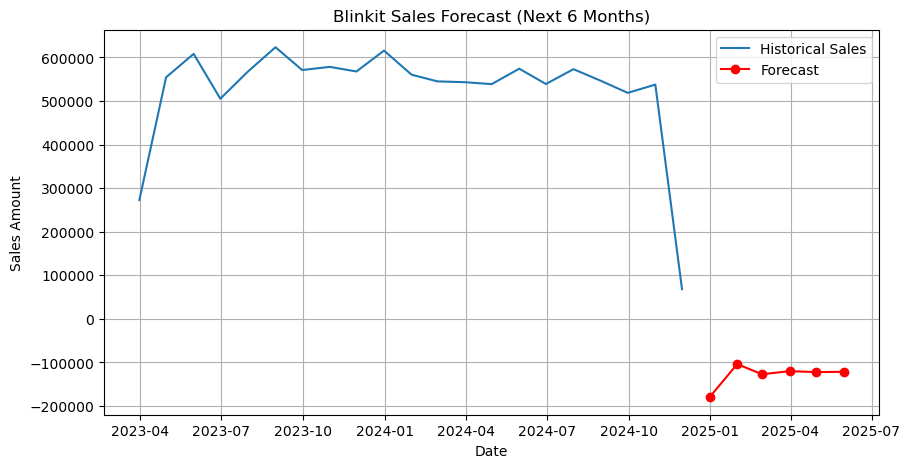

In [134]:
plt.figure(figsize=(10,5))
plt.plot(monthly_sales['order_total'], label='Historical Sales')
plt.plot(pd.date_range(monthly_sales.index[-1], periods=7, freq='ME')[1:], forecast, color='red', marker='o', label='Forecast')
plt.title("Blinkit Sales Forecast (Next 6 Months)")
plt.xlabel("Date")
plt.ylabel("Sales Amount")
plt.legend()
plt.grid(True)
plt.show()

In [139]:
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import pandas as pd

In [142]:
monthly_sales['log_sales'] = np.log(monthly_sales['order_total'])
model = ARIMA(monthly_sales['log_sales'], order=(1,1,1))
model_fit = model.fit()
forecast_log = model_fit.forecast(steps=6)
forecast = np.exp(forecast_log)
print("Forecasted Sales for Next 6 Months (Actual Scale):")
print(forecast)

Forecasted Sales for Next 6 Months (Actual Scale):
2024-12-31    101064.292016
2025-01-31     97981.788787
2025-02-28     98220.724317
2025-03-31     98201.915578
2025-04-30     98203.394391
2025-05-31     98203.278110
Freq: ME, Name: predicted_mean, dtype: float64


C:\Users\yashc\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


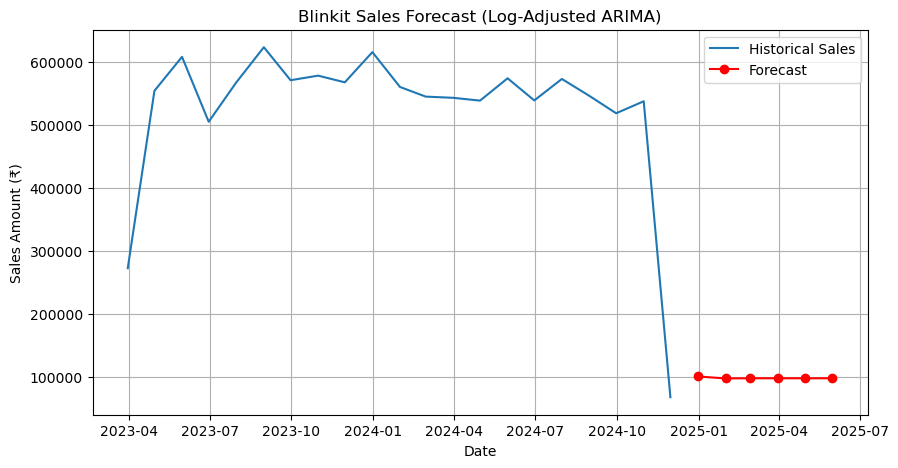

In [143]:
plt.figure(figsize=(10,5))
plt.plot(monthly_sales['order_total'], label='Historical Sales')
plt.plot(pd.date_range(monthly_sales.index[-1], periods=7, freq='ME')[1:], forecast, color='red', marker='o', label='Forecast')
plt.title("Blinkit Sales Forecast (Log-Adjusted ARIMA)")
plt.xlabel("Date")
plt.ylabel("Sales Amount (₹)")
plt.legend()
plt.grid(True)
plt.show()

In [144]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
import pandas as pd

In [147]:
sarima_model = SARIMAX(monthly_sales['order_total'],
                       order=(1,1,1),
                       seasonal_order=(1,1,1,6))
sarima_fit = sarima_model.fit()
sarima_forecast = sarima_fit.forecast(steps=6)

C:\Users\yashc\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


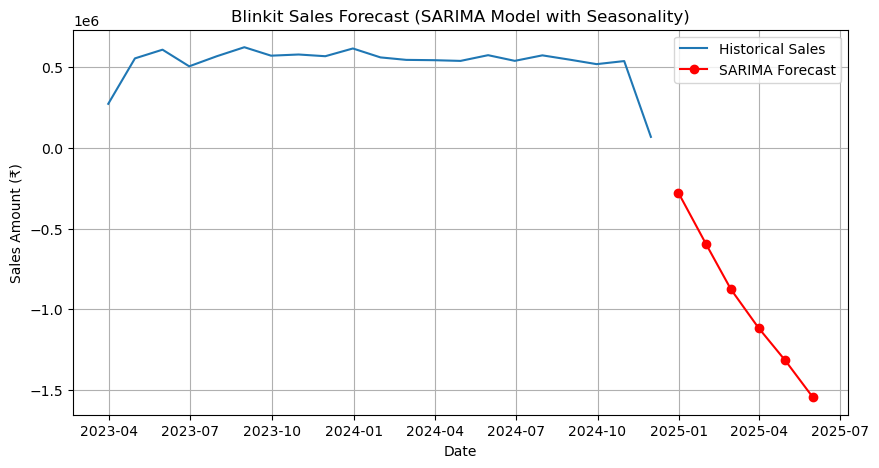

In [148]:
plt.figure(figsize=(10,5))
plt.plot(monthly_sales['order_total'], label='Historical Sales')
plt.plot(pd.date_range(monthly_sales.index[-1], periods=7, freq='ME')[1:], sarima_forecast,
         color='red', marker='o', label='SARIMA Forecast')
plt.title("Blinkit Sales Forecast (SARIMA Model with Seasonality)")
plt.xlabel("Date")
plt.ylabel("Sales Amount (₹)")
plt.legend()
plt.grid(True)
plt.show()

In [154]:
import numpy as np

monthly_sales['log_sales'] = np.log(monthly_sales['order_total'])
sarima_model = SARIMAX(monthly_sales['log_sales'],
                       order=(1,1,1),
                       seasonal_order=(1,1,1,6))
sarima_fit = sarima_model.fit()
forecast_log = sarima_fit.forecast(steps=6)
sarima_forecast = np.exp(forecast_log)

C:\Users\yashc\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


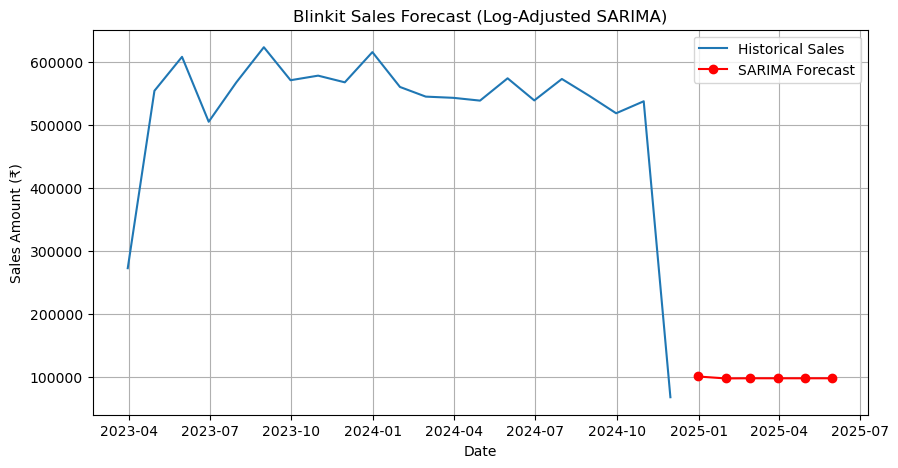

In [155]:
plt.figure(figsize=(10,5))
plt.plot(monthly_sales['order_total'], label='Historical Sales')
plt.plot(pd.date_range(monthly_sales.index[-1], periods=7, freq='ME')[1:], forecast, color='red', marker='o', label='SARIMA Forecast')
plt.title("Blinkit Sales Forecast (Log-Adjusted SARIMA)")
plt.xlabel("Date")
plt.ylabel("Sales Amount (₹)")
plt.legend()
plt.grid(True)
plt.show()

In [163]:
merged_data.to_csv('Blinkit_Merged_Data.csv', index=False)
monthly_sales.to_csv('Blinkit_Monthly_Sales.csv')
forecast_df = pd.DataFrame({
    'Month': pd.date_range(monthly_sales.index[-1], periods=7, freq='ME')[1:],
    'Forecast_ARIMA': forecast,
    'Forecast_SARIMA': sarima_forecast
})
forecast_df.to_csv('Blinkit_Forecast_Comparison.csv', index=False)